In [ ]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
from keras.datasets import mnist

# Load the data splitted between train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print ("Number of training data: ", len(train_labels))
print ("Training data shape: ", train_images.shape)
print ("Training data labels: ", train_labels)

print ("Number of test data: ", len(test_labels))
print ("Test data shape: ", test_images.shape)
print ("Test data labels: ", test_labels)

Number of training data:  60000
Training data shape:  (60000, 28, 28)
Training data labels:  [5 0 4 ... 5 6 8]
Number of test data:  10000
Test data shape:  (10000, 28, 28)
Test data labels:  [7 2 1 ... 4 5 6]


<Figure size 300x300 with 0 Axes>

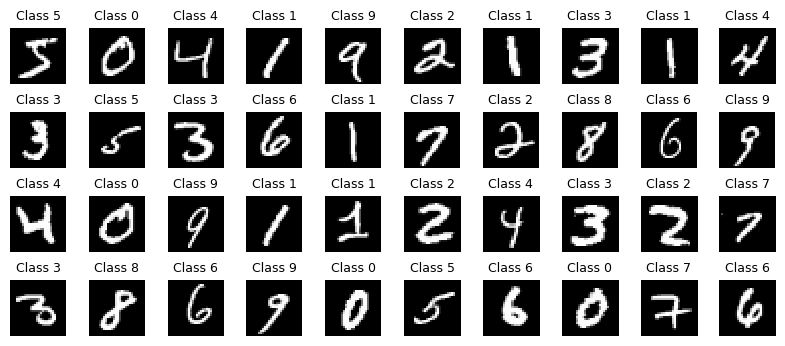

In [ ]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Show a few sample digits from the training set together with their labels
#plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
plt.figure(figsize=(3,3))
col1 = 10 # less columns
row1 = 4 # more rows
fig = plt.figure(figsize=(col1, row1))
for index1 in range(0, col1*row1):
    fig.add_subplot(row1, col1, index1 + 1)
    plt.axis('off')
    plt.imshow(train_images[index1]) # index of the sample image
    plt.subplots_adjust(hspace=0.5) # added space
    plt.title("Class " + str(train_labels[index1]), fontsize=9) # added fontsize
plt.show()

<Figure size 150x150 with 0 Axes>

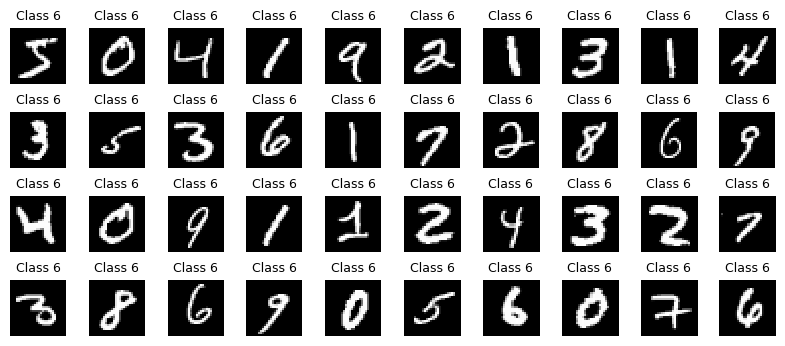

In [ ]:
# Show a few sample digits from the training set
#plt.rcParams['figure.figsize'] = (1.5, 1.5) # set default size of plots
plt.figure(figsize=(1.5,1.5))
col2 = 10 # less columns
row2 = 4 # less rows
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(train_images[index2]) # index of the sample image
    plt.subplots_adjust(hspace=0.5) # added space
    plt.title("Class " + str(train_labels[index1]), fontsize=9) # added title
plt.show()

In [ ]:
from keras import models
from keras import layers

num_classes = 10

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  # Increasing the number of neurons in the hidden layer
network.add(layers.Dropout(0.5))  # Adding a Dropout layer for regularization
network.add(layers.Dense(256, activation='relu'))  # Decreasing the number of neurons in the hidden layer
network.add(layers.Dropout(0.5))  # Adding another Dropout layer
network.add(layers.Dense(num_classes, activation='softmax'))
print(network.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 100

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 100

In [ ]:
import tensorflow
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils
#from keras.utils import to_categorical

train_labels = tensorflow.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tensorflow.keras.utils.to_categorical(test_labels, num_classes)
#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
epochs = 30        # more epochs
batch_size = 1000 # bigger batch_size
history = network.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size)


Epoch 1/30
60/60 [==============================] - 5s 65ms/step - loss: 0.6307 - accuracy: 0.8005
Epoch 2/30
60/60 [==============================] - 3s 55ms/step - loss: 0.2648 - accuracy: 0.9208
Epoch 3/30
60/60 [==============================] - 3s 45ms/step - loss: 0.1957 - accuracy: 0.9413
Epoch 4/30
60/60 [==============================] - 2s 39ms/step - loss: 0.1576 - accuracy: 0.9527
Epoch 5/30
60/60 [==============================] - 3s 43ms/step - loss: 0.1341 - accuracy: 0.9599
Epoch 6/30
60/60 [==============================] - 2s 37ms/step - loss: 0.1198 - accuracy: 0.9632
Epoch 7/30
60/60 [==============================] - 2s 37ms/step - loss: 0.1044 - accuracy: 0.9681
Epoch 8/30
60/60 [==============================] - 2s 37ms/step - loss: 0.0963 - accuracy: 0.9702
Epoch 9/30
60/60 [==============================] - 2s 39ms/step - loss: 0.0899 - accuracy: 0.9721
Epoch 10/30
60/60 [==============================] - 3s 42ms/step - loss: 0.0831 - accuracy: 0.9737
Epoch 11/

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9836
test_acc: 0.9836000204086304


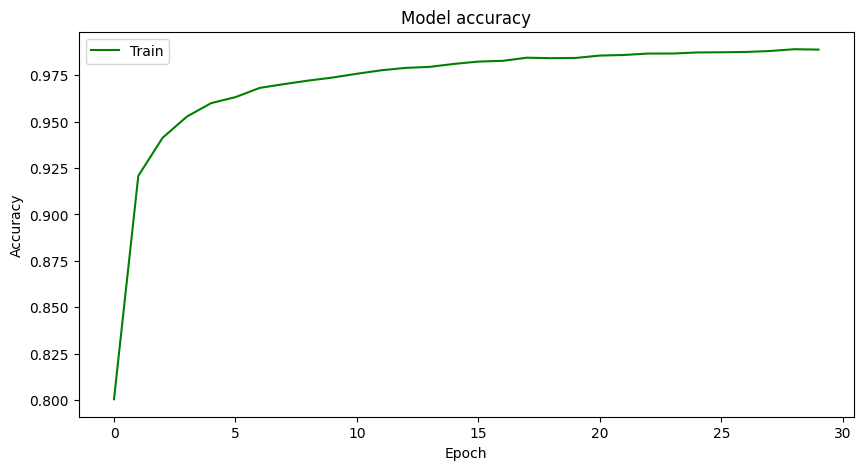

In [ ]:
# Plot training & validation accuracy values: https://keras.io/visualization/#training-history-visualization
plt.rcParams['figure.figsize'] = (10.0, 5.0) # set default size of plots
plt.plot(history.history['accuracy'], color='g') # The history object gets returned by the fit method of models.
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#conclusions
Too few epochs may lead to underfitting (the model doesn't learn enough),
while too many epochs may lead to overfitting (the model memorizes the training data but poorly generalizes).
It's worth experimenting with different epoch values and monitoring the model's

A larger batch size may speed up the learning process but may require more memory.
Too small batch size may lead to unstable learning.
A good approach is to choose a batch size that is as large as possible within the available memory constraints

In [ ]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='viridis',  # Changing the colormap to 'viridis'
                linecolor='black',  # Changing the line color to black
                linewidths=2,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 [==============================] - 1s 1ms/step


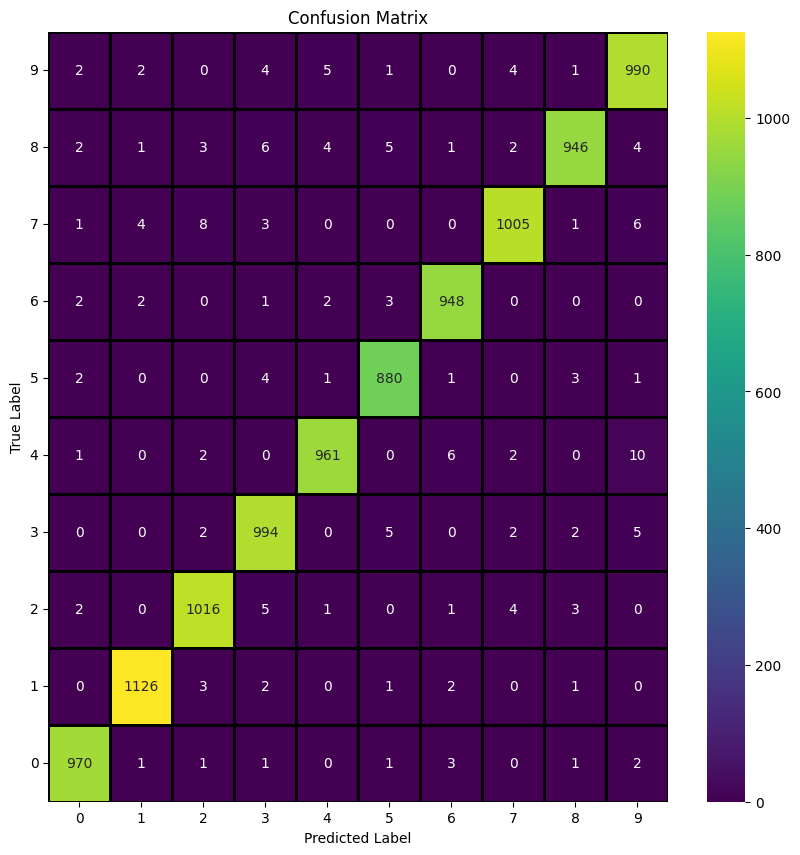

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
import numpy as np

# Use the trained model for predictions of the test data
test_labels_pred = network.predict(test_images)

# Take the class with the highest probability from the test predictions as a winning one
max_test_labels_pred = np.argmax(test_labels_pred, axis=1)
max_test_labels = np.argmax(test_labels, axis=1)

# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_labels, max_test_labels_pred, num_classes=num_classes)

# Print classification report
print(classification_report(max_test_labels, max_test_labels_pred))

In [ ]:
from keras.datasets import imdb

num_top_words = 10000  # Changing the number of top words to 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

print(train_data[0])  # Printing the modified train_data


17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In this modification, the num_top_words parameter has been changed to 10000. Instead of using the top 5000 most frequently occurring words in the dataset, now we're using the top 10000 most frequently occurring words. Adjusting this parameter can affect the vocabulary size and the representation of text data in the dataset.

In [ ]:
print('maximum word index: ', max([max(sequence) for sequence in train_data]))

maximum word index:  9999


The maximum word index in the training set will increase because the dictionary will contain more words.

In [ ]:
# Set the decoded review id:
decoded_review_id = 1  # Changing it to read another review, for example review with id 1

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words back
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3
# because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[decoded_review_id]])
print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back 

In [ ]:
def vectorize_sequences(sequences, dimension=None):
    if dimension is None:
        dimension = max([max(sequence) for sequence in sequences]) + 1  # Adding 1 to account for index 0
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

print(x_train[0])  # Printing the modified x_train


[0. 1. 1. ... 0. 0. 0.]


The new version of the vectorize_sequences function, however, dynamically determines the dimension parameter if it's not provided. It calculates the maximum index found in the sequences and adds 1 to it to account for index 0. This ensures that the resulting matrix has a dimension large enough to accommodate all unique words encountered in the sequences

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train[0]

1.0

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='relu', input_shape=(num_top_words,)))  # Changing the number of neurons in the first layer to 32
model1.add(layers.Dense(16, activation='relu'))  # Changing the number of neurons in the second layer to 16
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320577 (1.22 MB)
Trainable params: 320577 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Increasing the number of neurons in the first layer (from 16 to 32) can allow the model to learn more complex patterns in the training data. It may also improve the model's ability to extract features and generalize to test data.

Similarly, increasing the number of neurons in the second layer (from 8 to 16) can help the model learn more complex patterns. It can also aid in conveying information from the first layer to the output layer with greater expressive power.

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

model1.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),   # 'rmsprop'
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
x_val = x_train[:num_top_words]
partial_x_train = x_train[num_top_words:]

y_val = y_train[:num_top_words]
partial_y_train = y_train[num_top_words:]

In [ ]:
history1 = model1.fit(partial_x_train,
                      partial_y_train,
                      epochs=30, # more epoch
                      batch_size=1000, # bigger batch_size
                      validation_data=(x_val, y_val))

Epoch 1/30
15/15 [==============================] - 2s 117ms/step - loss: 0.6040 - accuracy: 0.6873 - val_loss: 0.5228 - val_accuracy: 0.8208
Epoch 2/30
15/15 [==============================] - 1s 48ms/step - loss: 0.4304 - accuracy: 0.8616 - val_loss: 0.4280 - val_accuracy: 0.8321
Epoch 3/30
15/15 [==============================] - 1s 47ms/step - loss: 0.3428 - accuracy: 0.8854 - val_loss: 0.3578 - val_accuracy: 0.8619
Epoch 4/30
15/15 [==============================] - 1s 48ms/step - loss: 0.2824 - accuracy: 0.9090 - val_loss: 0.3096 - val_accuracy: 0.8846
Epoch 5/30
15/15 [==============================] - 1s 47ms/step - loss: 0.2433 - accuracy: 0.9196 - val_loss: 0.2897 - val_accuracy: 0.8884
Epoch 6/30
15/15 [==============================] - 1s 47ms/step - loss: 0.2162 - accuracy: 0.9275 - val_loss: 0.2840 - val_accuracy: 0.8872
Epoch 7/30
15/15 [==============================] - 1s 47ms/step - loss: 0.1937 - accuracy: 0.9373 - val_loss: 0.2990 - val_accuracy: 0.8795
Epoch 8/30
1

In [ ]:
history1_dict = history1.history
history1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The History object stores the results of the training process for each epoch. It contains the following metrics for both the training and validation sets:

The value of the loss function, which measures how well the model is performing during training. It represents the discrepancy between the predicted outputs and the actual labels.

The accuracy of the model on the respective dataset, which measures the proportion of correctly predicted samples.

During the training process, these metrics are calculated and recorded for each epoch. The History object provides access to these metrics, allowing you to analyze the training progress and evaluate the performance of the model. You can use these metrics to plot training/validation loss and accuracy curves, identify overfitting or underfitting, and make decisions about model adjustments or further training iterations.

In [ ]:
def PlotLossComparison():
    plt.clf()   # clear figure
    #loss = history1_dict['loss']
    #val_loss = history1_dict['val_loss']
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'ro', label='Training loss')
    plt.plot(epochs, val_loss1, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

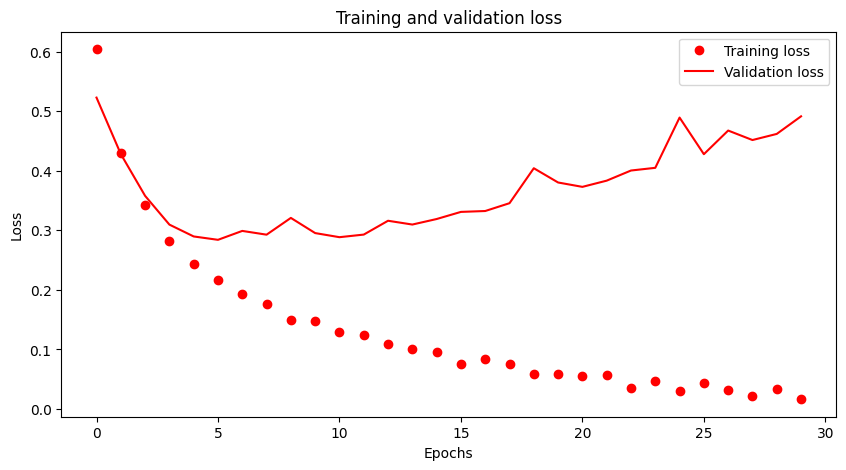

In [ ]:
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison()

In [ ]:
def PlotAccuracyComparison():
    plt.clf()   # clear figure
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'ro', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

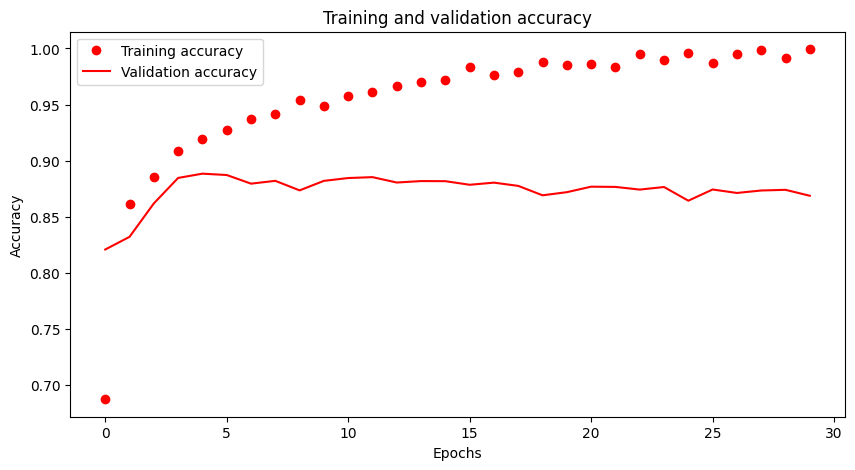

In [ ]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison()

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(8, activation='relu', input_shape=(num_top_words,)))  # Changing the number of neurons in the first layer to 8
model2.add(layers.Dense(8, activation='relu'))  # Changing the number of neurons in the second layer to 8
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 80008     
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80089 (312.85 KB)
Trainable params: 80089 (312.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),   # 'rmsprop'
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=30,
                      batch_size=1000,
                      validation_data=(x_val, y_val))
history2_dict = history2.history
history2_dict.keys()

Epoch 1/30
15/15 [==============================] - 2s 97ms/step - loss: 0.5903 - accuracy: 0.7094 - val_loss: 0.4891 - val_accuracy: 0.8303
Epoch 2/30
15/15 [==============================] - 1s 35ms/step - loss: 0.4153 - accuracy: 0.8708 - val_loss: 0.3911 - val_accuracy: 0.8725
Epoch 3/30
15/15 [==============================] - 1s 51ms/step - loss: 0.3269 - accuracy: 0.9085 - val_loss: 0.3447 - val_accuracy: 0.8767
Epoch 4/30
15/15 [==============================] - 1s 49ms/step - loss: 0.2765 - accuracy: 0.9183 - val_loss: 0.3175 - val_accuracy: 0.8834
Epoch 5/30
15/15 [==============================] - 1s 47ms/step - loss: 0.2396 - accuracy: 0.9291 - val_loss: 0.2989 - val_accuracy: 0.8852
Epoch 6/30
15/15 [==============================] - 1s 36ms/step - loss: 0.2100 - accuracy: 0.9381 - val_loss: 0.2922 - val_accuracy: 0.8863
Epoch 7/30
15/15 [==============================] - 1s 37ms/step - loss: 0.1884 - accuracy: 0.9445 - val_loss: 0.2807 - val_accuracy: 0.8874
Epoch 8/30
15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def PlotTwoLossComparison():
    plt.clf()   # clear figure
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'ro', label='Training loss 1')
    plt.plot(epochs, loss2, 'go', label='Training loss 2')
    plt.plot(epochs, val_loss1, 'r', label='Validation loss 1')
    plt.plot(epochs, val_loss2, 'g', label='Validation loss 2')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

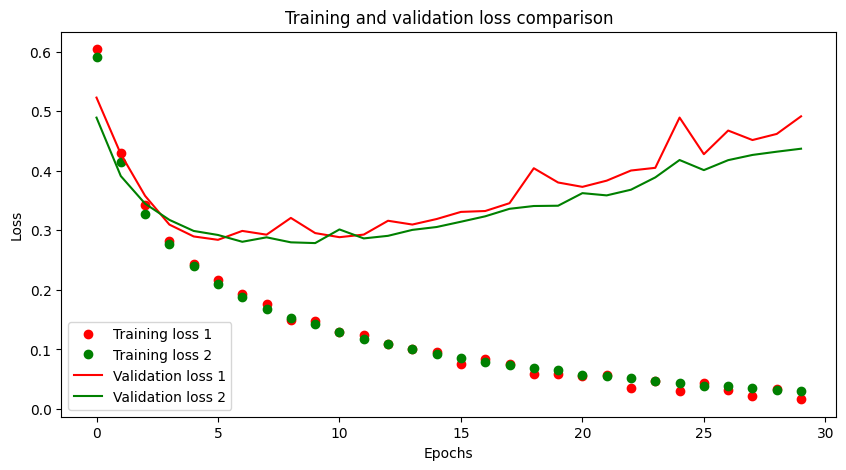

In [ ]:
#loss1 = history1_dict['loss']
loss2 = history2_dict['loss']
#val_loss1 = history1_dict['val_loss']
val_loss2 = history2_dict['val_loss']

PlotTwoLossComparison()

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(num_top_words,)))  # Changing the number of neurons in the first layer to 16
model3.add(layers.Dense(16, activation='relu'))  # Changing the number of neurons in the second layer to 16
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),   # 'rmsprop'
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=30,
                      batch_size=1000,
                      validation_data=(x_val, y_val))
history3_dict = history3.history
history3_dict.keys()

Epoch 1/30
15/15 [==============================] - 2s 95ms/step - loss: 0.6103 - accuracy: 0.6998 - val_loss: 0.5049 - val_accuracy: 0.8323
Epoch 2/30
15/15 [==============================] - 1s 39ms/step - loss: 0.4396 - accuracy: 0.8601 - val_loss: 0.4088 - val_accuracy: 0.8602
Epoch 3/30
15/15 [==============================] - 1s 38ms/step - loss: 0.3478 - accuracy: 0.8939 - val_loss: 0.3558 - val_accuracy: 0.8716
Epoch 4/30
15/15 [==============================] - 1s 39ms/step - loss: 0.2893 - accuracy: 0.9123 - val_loss: 0.3270 - val_accuracy: 0.8721
Epoch 5/30
15/15 [==============================] - 1s 49ms/step - loss: 0.2480 - accuracy: 0.9215 - val_loss: 0.2993 - val_accuracy: 0.8831
Epoch 6/30
15/15 [==============================] - 1s 49ms/step - loss: 0.2168 - accuracy: 0.9327 - val_loss: 0.2966 - val_accuracy: 0.8787
Epoch 7/30
15/15 [==============================] - 1s 40ms/step - loss: 0.1972 - accuracy: 0.9349 - val_loss: 0.2802 - val_accuracy: 0.8892
Epoch 8/30
15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def PlotTwoLossComparison():
    plt.clf()   # clear figure
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'ro', label='Training loss 1')
    plt.plot(epochs, loss2, 'go', label='Training loss 2')
    plt.plot(epochs, val_loss1, 'r', label='Validation loss 1')
    plt.plot(epochs, val_loss2, 'g', label='Validation loss 2')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

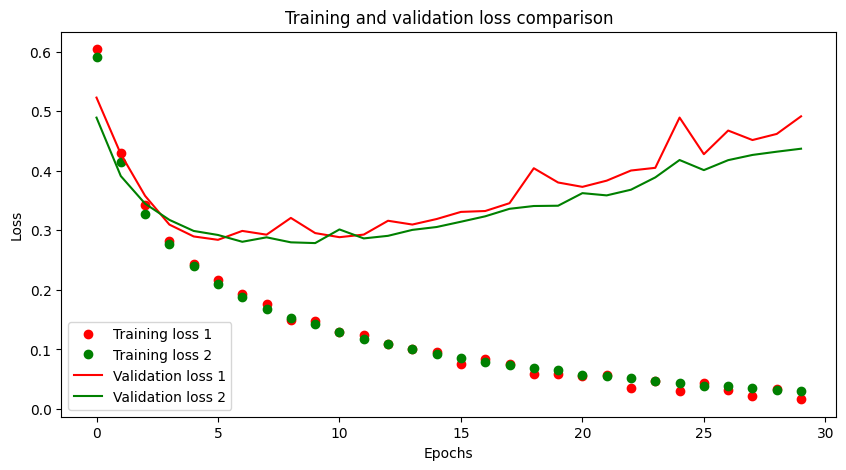

In [ ]:
#loss1 = history1_dict['loss']
loss2 = history2_dict['loss']
#val_loss1 = history1_dict['val_loss']
val_loss2 = history2_dict['val_loss']

PlotTwoLossComparison()

When dealing with an overfitting problem, reducing the number of neurons in the layers (as in model2) can help mitigate overfitting. A smaller number of neurons reduces the capacity of the model, which can help reduce the model's ability to match noise in the training data and increase its ability to generalize to new data.

In [ ]:
def PlotTwoAccuracyComparison():
    plt.clf()   # clear figure
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'ro', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

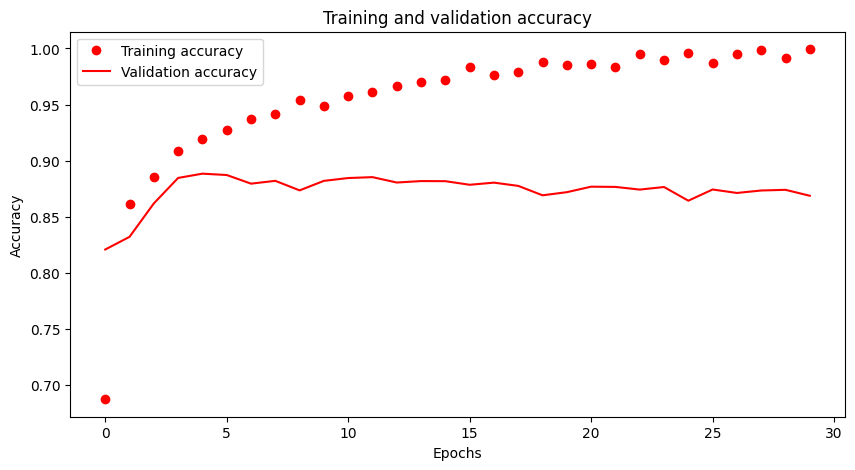

In [ ]:
acc2 = history2_dict['accuracy']
val_acc2 = history2_dict['val_accuracy']

PlotTwoAccuracyComparison()

In [ ]:
from keras.datasets import reuters

num_top_words=10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_top_words)
no_classes = 52

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
print('length of train data: ', len(train_data))
print('length of test data: ', len(test_data))
print('train data[0]: ', train_data[0])

length of train data:  8982
length of test data:  2246
train data[0]:  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
decoded_newswire_id = 1
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 5, '?') for i in train_data[decoded_newswire_id]])
print(decoded_newswire)
print("The class label associated with this example is: ", train_labels[decoded_newswire_id])


550378/550378 [==============================] - 0s 0us/step
? wages pacific barge looks last ? witte in last disputed improvement shares ? either are program c japan 000 374 of ? 4 looks ? points wages pacific barge to of said money vs want foreign wheat capacity ? ? past looks ? ? respectively of loss 2 now an will lift basis dlrs a
The class label associated with this example is:  4


In [ ]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=no_classes):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_top_words,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #changed from no_classes

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 46)                1518      
                                                                 
Total params: 643662 (2.46 MB)
Trainable params: 643662 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=1000,
                    validation_data=(x_val, y_val))

Epoch 1/30
8/8 [==============================] - 1s 79ms/step - loss: 3.3999 - accuracy: 0.4236 - val_loss: 2.7305 - val_accuracy: 0.5320
Epoch 2/30
8/8 [==============================] - 0s 62ms/step - loss: 2.3532 - accuracy: 0.5727 - val_loss: 2.0046 - val_accuracy: 0.6050
Epoch 3/30
8/8 [==============================] - 0s 59ms/step - loss: 1.7919 - accuracy: 0.6452 - val_loss: 1.6545 - val_accuracy: 0.6490
Epoch 4/30
8/8 [==============================] - 0s 60ms/step - loss: 1.4886 - accuracy: 0.6944 - val_loss: 1.4574 - val_accuracy: 0.6710
Epoch 5/30
8/8 [==============================] - 0s 59ms/step - loss: 1.2926 - accuracy: 0.7211 - val_loss: 1.3343 - val_accuracy: 0.6980
Epoch 6/30
8/8 [==============================] - 0s 60ms/step - loss: 1.1530 - accuracy: 0.7467 - val_loss: 1.2370 - val_accuracy: 0.7070
Epoch 7/30
8/8 [==============================] - 1s 67ms/step - loss: 1.0397 - accuracy: 0.7705 - val_loss: 1.1746 - val_accuracy: 0.7260
Epoch 8/30
8/8 [===========

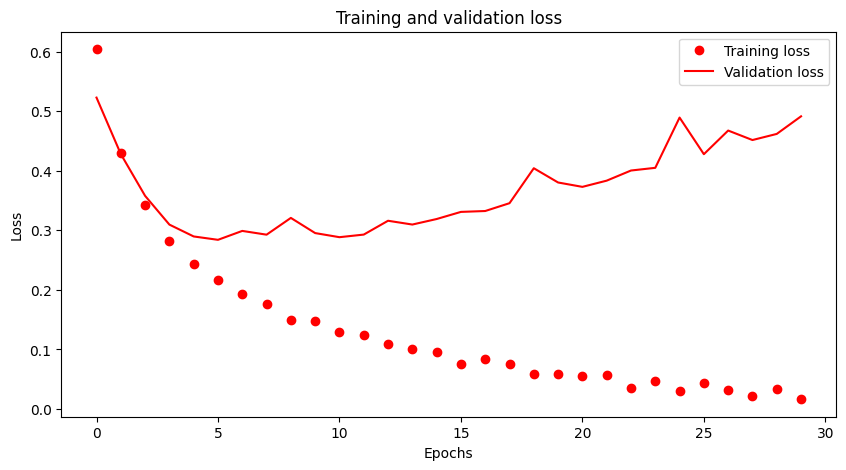

In [ ]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison()

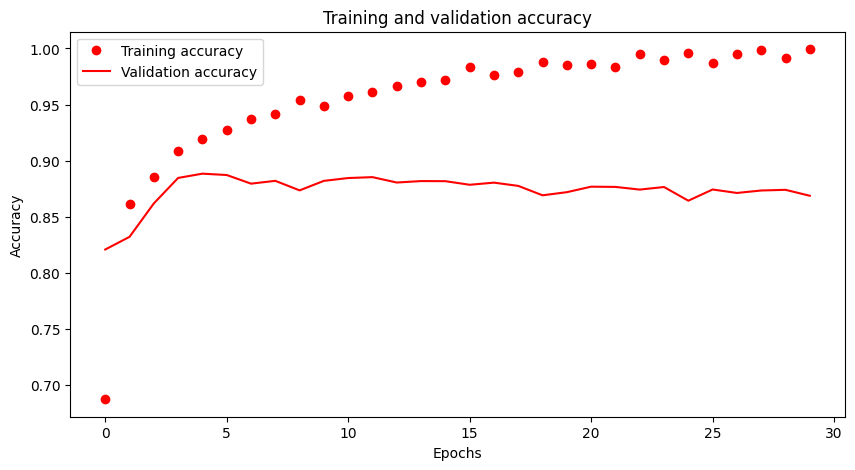

In [ ]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_top_words,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=1000,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                640064    
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 46)                1518      
                                                                 
Total params: 643662 (2.46 MB)
Trainable params: 643662 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
8/8 [==============================] - 1s 77ms/step - loss: 3.4757 - accuracy: 0.3799 - val_loss: 2.9430 - val_accuracy: 0.5320
Epoch 2/5
8/8 [==============================] - 0s 59ms/step - loss: 2.5881 - accuracy: 0.5452 - val_loss: 2.2279 - val_accuracy: 0.5710
Epoch 

In [ ]:
print('results: ', results)

results:  [1.402444839477539, 0.6963490843772888]


In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
print('test labels:', float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels))

test labels: 0.19323241317898487


In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
print('predictions[0]:', predictions[0].shape)
print('sum of predictions:', np.sum(predictions[0]))
print('highest probability value:', np.argmax(predictions[0]))

predictions[0]: (46,)
sum of predictions: 1.0000001
highest probability value: 3


In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(num_top_words,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.summary()

model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=30,
                      batch_size=1000,
                      validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                320032    
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 46)                782       
                                                                 
Total params: 321342 (1.23 MB)
Trainable params: 321342 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
8/8 [==============================] - 1s 60ms/step - loss: 3.6700 - accuracy: 0.2407 - val_loss: 3.3939 - val_accuracy: 0.3560
Epoch 2/30
8/8 [==============================] - 0s 39ms/step - loss: 3.1805 - accuracy: 0.3741 - val_loss: 2.9061 - val_accuracy: 0.3780
Epoc

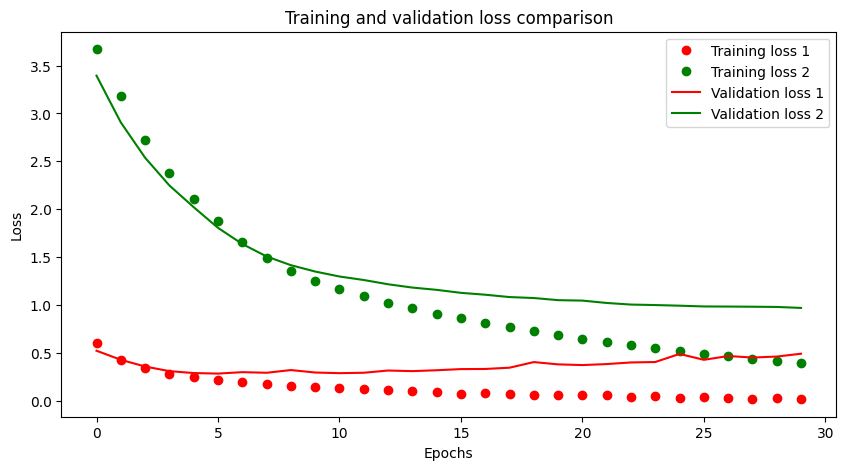

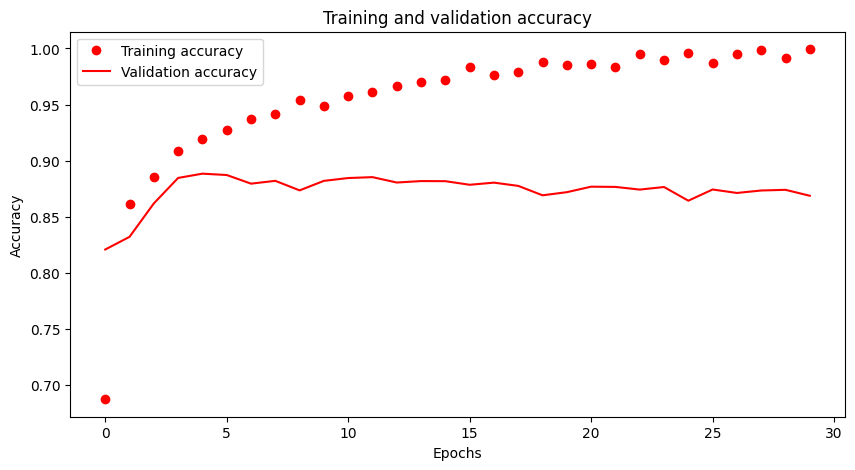

In [ ]:
history2_dict = history2.history

#loss1 = history1_dict['loss']
loss2 = history2_dict['loss']
#val_loss1 = history1_dict['val_loss']
val_loss2 = history2_dict['val_loss']
PlotTwoLossComparison()

acc2 = history2_dict['accuracy']
val_acc2 = history2_dict['val_accuracy']
PlotTwoAccuracyComparison()

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print('shape of the train_data: ', train_data.shape)
print('shape of the test_data: ', test_data.shape)
print('the target labels: ', train_targets)

shape of the train_data:  (404, 13)
shape of the test_data:  (102, 13)
the target labels:  [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 

In [ ]:
# Calculate the mean value for each feature across all training samples
mean = train_data.mean(axis=0)

# Calculate the standard deviation for each feature across all training samples
std = train_data.std(axis=0)

# Standardize the training data by subtracting the mean and dividing by the standard deviation
train_data -= mean
train_data /= std

# Standardize the test data using the same mean and standard deviation as the training data
test_data -= mean
test_data /= std


In [ ]:
def build_model():
    # Because we will need to instantiate the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
import numpy as np

k = 4  # Change the number of folds for cross-validation
num_val_samples = len(train_data) // k  # Number of validation samples per fold
num_epochs = 110  # Change the number of epochs for training
all_scores = []  # List to store validation scores for each fold

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (assuming the function build_model() is defined elsewhere)
    model = build_model()

    # Train the model
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=32, verbose=0)  # Change the batch size

    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    # Append the validation MAE to the list of scores
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
print('all scores: ', all_scores)
print('mean of the results: ', np.mean(all_scores))

all scores:  [2.125608205795288, 2.6895291805267334, 2.428455352783203, 2.521442174911499]
mean of the results:  2.441258728504181


In [ ]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [ ]:
num_epochs = 400
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    #print (history.history.keys())
    #mae_history = history.history['val_mean_absolute_error']
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories])
                       for i in range(num_epochs)]

In [ ]:
argmin = np.argmin(average_mae_history)
print('lowest probability value: ', argmin)
print('average_mae_history', average_mae_history[np.argmin(average_mae_history)])

lowest probability value:  299
average_mae_history 2.3312695920467377


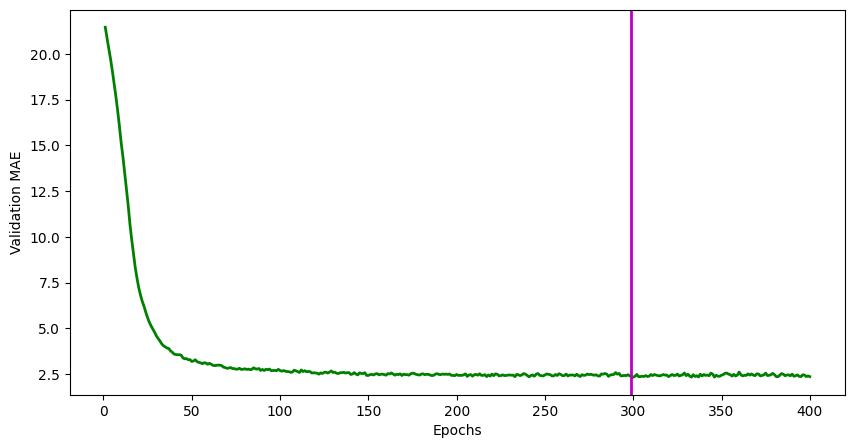

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, color='g',linewidth=2)
plt.axvline(x=argmin, color='m', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

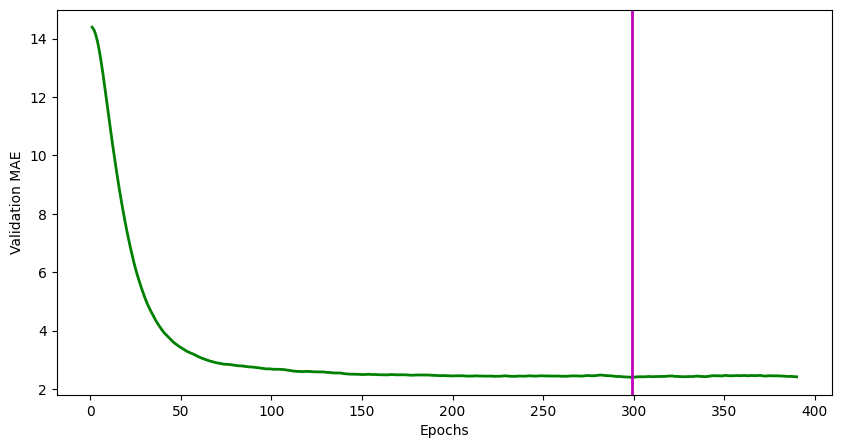

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, color='g', linewidth=2)
plt.axvline(x=argmin, color='m', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=300, batch_size=32, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 3ms/step - loss: 15.2165 - mae: 2.6105


In [ ]:
test_mae_score

2.6104838848114014